<a href="https://colab.research.google.com/github/MastercodeJ/MyWorks/blob/master/Nba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This code explores the NBA players from 2013 - 2014 basketball season, and 
#uses a machine learning algorithm called KMeans to group them in clusters,
#This will show which players are most similar

In [ ]:
# Import the dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Load the data
# from google.colab import files
# uploaded = files.upload()
nba = pd.read_csv('players_stats.csv')
nba.head(7)

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,EFF,AST/TOV,STL/TOV,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,16,24,66.7,6,26,32,46,7,0,14,15,110,3.29,0.50,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,145,174,83.3,32,134,166,261,54,15,157,189,791,1.66,0.34,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,44,61,72.1,46,123,169,33,21,22,38,83,318,0.87,0.55,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,30,46,65.2,48,114,162,30,19,9,44,88,244,0.68,0.43,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,107,141,75.9,131,413,544,244,68,98,100,121,1530,2.44,0.68,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384
5,Al Jefferson,65,1992,1082,486,1010,48.1,2,5,40.0,108,165,65.5,99,449,548,113,47,84,68,139,1225,1.66,0.69,30.0,us,"January 4, 1985",NaN,10,205.0,C,CHA,130.05,30.945866
6,Alan Anderson,74,1744,545,195,440,44.3,73,210,34.8,82,101,81.2,31,173,204,83,56,5,60,148,569,1.38,0.93,33.0,us,"October 16, 1982",Michigan State University,5,195.0,SG,NJN,99.00,26.035503


In [ ]:
# Get the number of rows and columns(490 rows or players and 34 colums or features)
nba.shape


(490, 34)

In [ ]:
# Find the average value for each numeric column
nba.mean()

Games Played      53.014286
MIN             1214.714286
PTS              502.108163
FGM              188.338776
FGA              419.526531
FG%               43.099184
3PM               39.387755
3PA              112.524490
3P%               25.519184
FTM               86.042857
FTA              114.689796
FT%               70.450408
OREB              54.655102
DREB             162.697959
REB              217.353061
AST              110.616327
STL               38.838776
BLK               24.075510
TOV               68.826531
PF               101.483673
EFF              564.330612
AST/TOV            1.465837
STL/TOV            0.626000
Age               27.507109
Height           197.440758
Weight            99.469194
BMI               25.427747
dtype: float64

In [ ]:
# Get the mean / average of specific column
nba.loc[:,'FGM'].mean()

188.33877551020407

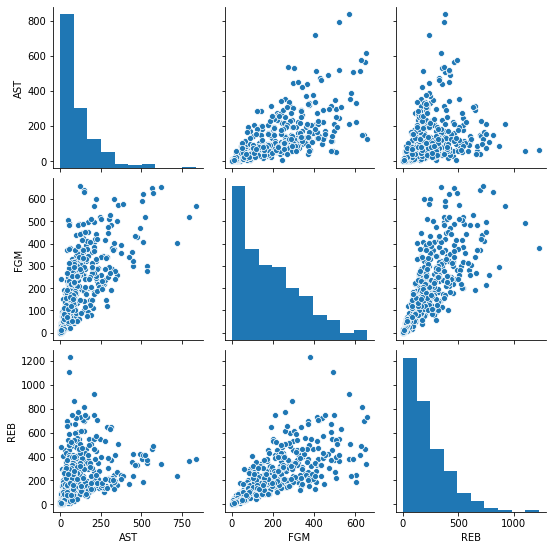

In [ ]:
# Make a pairwise scatter plot
sns.pairplot(nba[['AST','FGM','REB']])

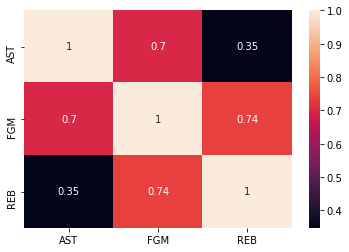

In [ ]:
# Make Heat map to see correlations
correlation = nba[['AST','FGM','REB']].corr()
sns.heatmap(correlation, annot = True)

In [ ]:
# Make the cluster of players using KMeans
from sklearn.cluster import KMeans 
kmeans_model = KMeans(n_clusters=5, random_state=1)# Creating KMeans model with S clusters
good_columns = nba._get_numeric_data().dropna(axis=1) # get numeric data and remove columns with missing data
kmeans_model.fit(good_columns) # Train the model
labels = kmeans_model.labels_ #Get the labels or (cluster label for each player)
labels

array([0, 1, 4, 4, 3, 1, 2, 4, 0, 2, 4, 4, 2, 4, 4, 2, 1, 4, 0, 3, 1, 2,
       4, 4, 0, 2, 0, 3, 4, 3, 2, 2, 4, 0, 2, 1, 0, 2, 1, 4, 1, 2, 0, 2,
       3, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 2, 3, 0, 0, 2, 0, 2, 1, 2, 2, 0,
       1, 2, 4, 2, 4, 2, 4, 0, 0, 2, 3, 0, 4, 1, 0, 4, 0, 2, 4, 1, 4, 2,
       1, 1, 0, 3, 4, 2, 4, 1, 2, 2, 0, 0, 4, 2, 4, 0, 0, 1, 3, 0, 1, 3,
       1, 2, 1, 3, 2, 2, 2, 0, 4, 1, 3, 4, 1, 4, 0, 3, 4, 0, 0, 2, 0, 1,
       0, 0, 1, 0, 1, 4, 0, 0, 3, 3, 1, 0, 2, 0, 2, 1, 4, 0, 4, 0, 4, 4,
       2, 2, 2, 1, 0, 3, 0, 4, 0, 0, 3, 3, 1, 0, 3, 0, 0, 1, 1, 2, 4, 2,
       4, 2, 0, 4, 2, 4, 1, 4, 2, 4, 4, 0, 2, 4, 0, 1, 2, 4, 3, 2, 4, 0,
       0, 0, 0, 0, 2, 2, 0, 1, 4, 0, 2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0,
       0, 4, 1, 0, 0, 2, 0, 3, 2, 1, 1, 2, 0, 2, 3, 0, 4, 4, 0, 2, 0, 0,
       0, 3, 0, 4, 2, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1, 2, 0, 4, 4, 2, 0,
       1, 2, 1, 0, 4, 1, 2, 1, 0, 2, 4, 3, 2, 2, 1, 2, 2, 3, 2, 2, 4, 2,
       0, 1, 3, 4, 2, 3, 3, 2, 2, 0, 2, 0, 4, 4, 4,

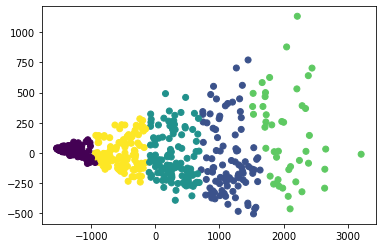

In [ ]:
# Plot players by cluster
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(good_columns)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show()

In [ ]:
# Find player LeBron
LeBron = good_columns.loc[ nba['Name'] == 'LeBron James',:]
# Find player Durant
Durant = good_columns.loc[ nba['Name'] == 'Kevin Durant',:]
print(LeBron)
print(Durant)

     Games Played   MIN   PTS  FGM   FGA  ...  TOV   PF   EFF  AST/TOV  STL/TOV
301            69  2493  1743  624  1279  ...  272  135  1748     1.88      0.4

[1 rows x 23 columns]
     Games Played  MIN  PTS  FGM  FGA  ...  TOV  PF  EFF  AST/TOV  STL/TOV
273            27  913  686  238  467  ...   74  40  695     1.49     0.32

[1 rows x 23 columns]


In [ ]:
# Converting the data into lists for model prediction
LeBron_list = LeBron.values.tolist()
Durant_list = Durant.values.tolist()

#  The cluster classification of LeBron James and Kevin Durant
LeBron_cluster = kmeans_model.predict(LeBron_list) # LeBron belongs to cluster 3
Durant_cluster = kmeans_model.predict(Durant_list) # Kevin Durant belongs to cluster 2

# print the cluster label
print(LeBron_cluster)
print(Durant_cluster)

[3]
[2]


In [ ]:
nba.corr()

,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,EFF,AST/TOV,STL/TOV,Age,Height,Weight,BMI
Games Played,1.000000,0.872959,0.727973,0.739667,0.741407,0.369492,0.492036,0.510728,0.218361,0.575342,0.602332,0.341861,0.527621,0.715931,0.681647,0.541304,0.684127,0.459709,0.693894,0.860430,0.757467,0.169564,0.012988,0.139838,0.068284,0.080360,0.065185
MIN,0.872959,1.000000,0.920196,0.924123,0.926747,0.304910,0.601725,0.618675,0.278590,0.775022,0.794161,0.322838,0.557974,0.818281,0.764759,0.707129,0.838759,0.499512,0.858630,0.872932,0.923723,0.198229,-0.045213,0.087547,0.009521,0.033385,0.052763
PTS,0.727973,0.920196,1.000000,0.990487,0.988716,0.275514,0.615766,0.627413,0.290644,0.909402,0.901151,0.340922,0.482101,0.756875,0.696554,0.728515,0.807294,0.445102,0.883540,0.753363,0.941961,0.166571,-0.102540,0.063428,-0.016891,0.030831,0.078018
FGM,0.739667,0.924123,0.990487,1.000000,0.986789,0.310255,0.548751,0.560697,0.254783,0.868013,0.872212,0.315404,0.538947,0.791827,0.739720,0.704545,0.789740,0.488795,0.872757,0.775502,0.951369,0.147698,-0.111683,0.065786,0.026565,0.077724,0.105658
FGA,0.741407,0.926747,0.988716,0.986789,1.000000,0.231871,0.624375,0.646638,0.309729,0.865389,0.856496,0.345325,0.449027,0.736550,0.671447,0.742096,0.811240,0.406254,0.886276,0.757420,0.915277,0.195855,-0.100390,0.061307,-0.047915,0.002796,0.067171
FG%,0.369492,0.304910,0.275514,0.310255,0.231871,1.000000,-0.045385,-0.070072,-0.097218,0.235433,0.286115,0.220422,0.470353,0.417240,0.449062,0.084949,0.184414,0.419133,0.226864,0.375768,0.383651,-0.124186,-0.064153,0.089074,0.366599,0.383616,0.216849
3PM,0.492036,0.601725,0.615766,0.548751,0.624375,-0.045385,1.000000,0.988563,0.537028,0.443760,0.379603,0.358969,-0.118551,0.225727,0.124296,0.526855,0.586909,-0.058761,0.495797,0.389995,0.453904,0.289378,0.065442,0.074057,-0.301668,-0.304422,-0.153515
3PA,0.510728,0.618675,0.627413,0.560697,0.646638,-0.070072,0.988563,1.000000,0.531573,0.462710,0.400393,0.364440,-0.121615,0.231113,0.127186,0.556058,0.614236,-0.065263,0.526029,0.407298,0.457740,0.308285,0.068205,0.060393,-0.324040,-0.326490,-0.164209
3P%,0.218361,0.278590,0.290644,0.254783,0.309729,-0.097218,0.537028,0.531573,1.000000,0.189836,0.138248,0.317313,-0.234864,0.017859,-0.061888,0.292613,0.280100,-0.196782,0.221739,0.099524,0.160524,0.349797,0.101430,0.013422,-0.355749,-0.425045,-0.306359
FTM,0.575342,0.775022,0.909402,0.868013,0.865389,0.235433,0.443760,0.462710,0.189836,1.000000,0.981130,0.308123,0.445989,0.670055,0.622757,0.679796,0.720861,0.415265,0.836937,0.623557,0.859884,0.112697,-0.126039,0.028665,-0.007247,0.040284,0.082334


In [ ]:
# Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(nba[['FGM']],nba[['AST']], test_size=0.2, random_state=2)

In [ ]:
# Predict the number of assists per player from the field goals made
# Create the Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)# training the model
predictions = lr.predict(x_test)# Make predictions on the test data

print(predictions)# printthe predictions
print(y_test) #Print the actual values


[[111.45468773]
 [ 23.66787842]
 [274.16781836]
 [ 84.0562568 ]
 [136.61651205]
 [ 62.80849404]
 [ 14.16230034]
 [ 11.36654209]
 [265.22139193]
 [  6.89332887]
 [ 11.36654209]
 [ 31.49600154]
 [147.79954509]
 [  4.09757061]
 [108.65892947]
 [100.83080635]
 [118.16450755]
 [108.65892947]
 [ 35.41006311]
 [  4.09757061]
 [167.36985289]
 [147.79954509]
 [132.70245049]
 [139.41227031]
 [143.88548353]
 [ 14.16230034]
 [231.67229283]
 [ 23.66787842]
 [127.67008563]
 [  8.01163218]
 [340.14771325]
 [ 90.20692497]
 [134.37990545]
 [145.00378683]
 [ 41.56073127]
 [ 11.92569374]
 [ 79.58304359]
 [217.69350154]
 [ 32.61430485]
 [ 25.90448503]
 [109.77723277]
 [ 35.96921476]
 [145.00378683]
 [288.14660965]
 [192.53167722]
 [340.14771325]
 [ 15.8397553 ]
 [170.7247628 ]
 [ 37.64666971]
 [ 47.71139944]
 [ 64.48594899]
 [257.39326881]
 [137.73481536]
 [ 42.11988293]
 [  4.09757061]
 [ 20.87212016]
 [126.55178232]
 [137.73481536]
 [  3.53841896]
 [169.04730785]
 [110.33638443]
 [101.94910965]
 [ 71.75

In [ ]:
# Test model: Score returns the coefficient of determination R^2 of the predidction
lr_confidence = lr.score(x_test, y_test)
print("lr confience: ", lr_confidence)

lr confience:  0.6010860109306481
